<a href="https://colab.research.google.com/github/soumo99/Data-Analytics-Project/blob/main/Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cohort Analysis
Data analysis technique used to gain insights into the behaviour and characteristics of specific groups of users or customers over time.

Cohort analysis is valuable for businesses as it allows them to understand user behaviour in a more granular and actionable way. Below is the process we can follow for the task of Cohort Analysis:


1. The first step is to define the cohorts based on a specific characteristic or event. For example, in an e-commerce platform, cohorts could be defined based on the month of a user’s first purchase.

2.  Gather relevant data for analysis.

3.  Determine the time intervals we want to analyze.

4.  Group users into cohorts based on the defined characteristic or event.

5.  Choose the key performance metrics we want to analyze.

6.  Calculate the chosen metrics for each cohort over the specified time periods.

7.  Create visualizations to present in our findings effectively.

***Cohort Analysis*** is a method used in analytics and business intelligence to group customers or users into cohorts based on shared characteristics or experiences within a defined time-span. These cohorts are then tracked over time to observe changes in behavior, usage, or other key metrics.


# TASK -

Identify trends in the acquisition of new users and the retention of returning users on a weekly basis.

Understand how user engagement, as indicated by the average duration of interaction, evolves from the first day to the seventh day of usage.

Detect any significant weekly patterns or anomalies in user behavior and engagement, and investigate the potential causes behind these trends.

Explore the relationship between user retention (returning users) and engagement (duration metrics), to assess the effectiveness of user engagement strategies.

Provide actionable insights that can guide marketing efforts, content strategies, and user experience improvements.

In [1]:
import numpy as np
import pandas as pd

The provided dataset contains user interaction data, including metrics such as the number of new and returning users, and their engagement durations on Day 1 and Day 7. The data is structured with dates, allowing for time-series analysis. Key columns in the dataset are:

Date: The specific dates of user interactions.

New Users: The count of new users for each date.

Returning Users: The count of users returning on each date.

Duration Day 1: The average duration (possibly in minutes or seconds) of user interaction on their first day.

Duration Day 7: The average duration of user interaction on their seventh day.


In [2]:
data = pd.read_csv('/content/cohorts.csv')

In [3]:
data.head()

,Date,New users,Returning users,Duration Day 1,Duration Day 7
0,25/10/2023,3461,1437,202.156977,162.523809
1,26/10/2023,3777,1554,228.631944,258.147059
2,27/10/2023,3100,1288,227.185841,233.550000
3,28/10/2023,2293,978,261.079545,167.357143
4,29/10/2023,2678,1082,182.567568,304.350000


In [4]:
data.tail()

,Date,New users,Returning users,Duration Day 1,Duration Day 7
25,19/11/2023,3577,1114,445.872340,0.0
26,20/11/2023,4790,1630,218.441177,0.0
27,21/11/2023,4197,1632,146.167488,0.0
28,22/11/2023,4304,1766,273.037037,0.0
29,23/11/2023,3780,1437,59.047619,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             30 non-null     object 
 1   New users        30 non-null     int64  
 2   Returning users  30 non-null     int64  
 3   Duration Day 1   30 non-null     float64
 4   Duration Day 7   30 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.3+ KB


In [6]:
data.describe()

,New users,Returning users,Duration Day 1,Duration Day 7
count,30.000000,30.000000,30.000000,30.000000
mean,3418.166667,1352.866667,208.259594,136.037157
std,677.407486,246.793189,64.730830,96.624319
min,1929.000000,784.000000,59.047619,0.000000
25%,3069.000000,1131.500000,182.974287,68.488971
50%,3514.500000,1388.000000,206.356554,146.381667
75%,3829.500000,1543.750000,230.671046,220.021875
max,4790.000000,1766.000000,445.872340,304.350000


The descriptive statistics provide the following insights:

New Users: The average number of new users is around 3,418 with a standard deviation of approximately 677. The minimum and maximum new users recorded are 1,929 and 4,790, respectively.

Returning Users: On average, there are about 1,353 returning users, with a standard deviation of around 247. The minimum and maximum are 784 and 1,766, respectively.

Duration Day 1: The average duration on the first day is about 208 seconds with a considerable spread (standard deviation is around 65).

Duration Day 7: The average 7-day duration is lower, around 136 seconds, with a larger standard deviation of about 97. The range is from 0 to 304.


In [7]:
data.isnull().sum()

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64

In [8]:
data.dtypes

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object

Convert 'Date' column to datetime format

In [9]:
data['Date'] = pd.to_datetime(data['Date'],format = '%d/%m/%Y')

In [10]:
data['Date'].dtype

dtype('<M8[ns]')

In [11]:
data.dtypes

Date               datetime64[ns]
New users                   int64
Returning users             int64
Duration Day 1            float64
Duration Day 7            float64
dtype: object

In [12]:
data['Date'].unique()

array(['2023-10-25T00:00:00.000000000', '2023-10-26T00:00:00.000000000',
       '2023-10-27T00:00:00.000000000', '2023-10-28T00:00:00.000000000',
       '2023-10-29T00:00:00.000000000', '2023-10-30T00:00:00.000000000',
       '2023-10-31T00:00:00.000000000', '2023-11-01T00:00:00.000000000',
       '2023-11-02T00:00:00.000000000', '2023-11-03T00:00:00.000000000',
       '2023-11-04T00:00:00.000000000', '2023-11-05T00:00:00.000000000',
       '2023-11-06T00:00:00.000000000', '2023-11-07T00:00:00.000000000',
       '2023-11-08T00:00:00.000000000', '2023-11-09T00:00:00.000000000',
       '2023-11-10T00:00:00.000000000', '2023-11-11T00:00:00.000000000',
       '2023-11-12T00:00:00.000000000', '2023-11-13T00:00:00.000000000',
       '2023-11-14T00:00:00.000000000', '2023-11-15T00:00:00.000000000',
       '2023-11-16T00:00:00.000000000', '2023-11-17T00:00:00.000000000',
       '2023-11-18T00:00:00.000000000', '2023-11-19T00:00:00.000000000',
       '2023-11-20T00:00:00.000000000', '2023-11-21

# Trend of the new and returning users over time:

In [13]:
pip install gitly

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.4 MB/s eta 0:00:00
  Created wheel for gitly: filename=gitly-1.1.4-py3-none-any.whl size=4502 sha256=b85b81e1b3b711a5767d6f8e2f7b377bf52a44afb0cf459a2528bfd266fdf1e2
  Stored in directory: /root/.cache/pip/wheels/ac/6f/10/804eecc1778739e42d96317afd1248452cd6f1fe4c7eb56cde
Successfully built gitly
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [14]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from gitly.colab.plot import GitlyPlotter
gitly = GitlyPlotter('github')
init_notebook_mode(connected=True)

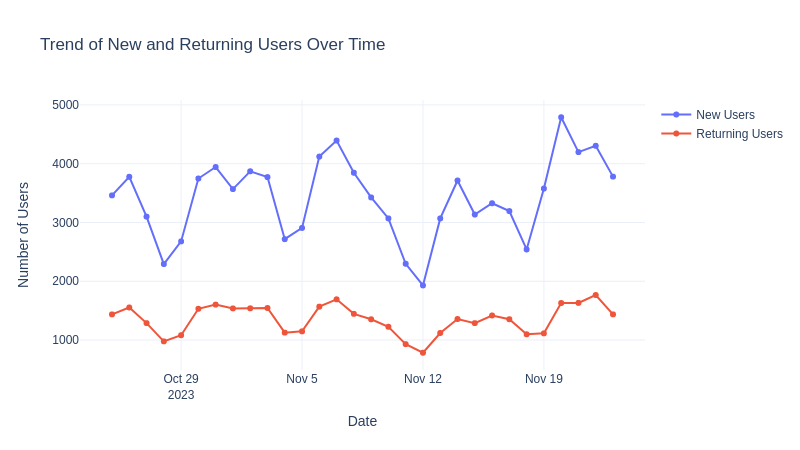

In [15]:
# Trend analysis for New and Returning Users
figure = go.Figure()

# A set of datapoints in known as trace
# New Users
figure.add_trace(go.Scatter(x=data['Date'], y=data['New users'], mode='lines+markers', name='New Users'))

# Returning Users
figure.add_trace(go.Scatter(x=data['Date'], y=data['Returning users'], mode='lines+markers', name='Returning Users'))

# Update layout
figure.update_layout(title='Trend of New and Returning Users Over Time',
                  xaxis_title='Date',
                  yaxis_title='Number of Users')

gitly.show(figure)

#Trend of duration over time

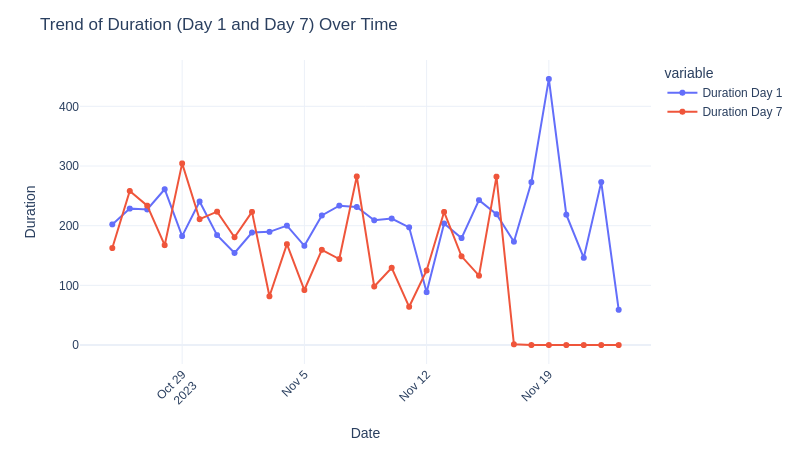

In [17]:
figure = px.line(data_frame=data, x='Date', y=['Duration Day 1', 'Duration Day 7'], markers=True, labels={'value': 'Duration'})
figure.update_layout(title='Trend of Duration (Day 1 and Day 7) Over Time', xaxis_title='Date', yaxis_title='Duration', xaxis=dict(tickangle=-45))
gitly.show(figure)


<ipython-input-18-1643a5d8a2f8>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



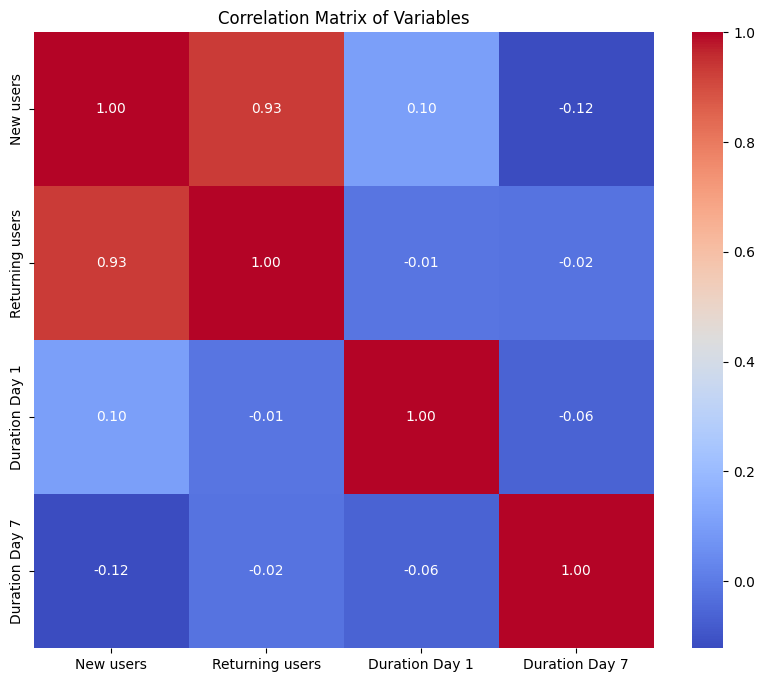

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()


Here, the strongest correlation is between the number of new and returning users, indicating a potential trend of new users converting to returning users.



# Performing Cohort Analysis using Python

For the task of Cohort Analysis, we’ll group the data by the week of the year to create cohorts. Then, for each cohort (week), we’ll calculate the average number of new and returning users, as well as the average of Duration Day 1 and Duration Day 7. Let’s start by grouping the data by week and calculating the necessary averages:

ISO week number starts on Monday and ends on Sunday, the function is used to extract the ISO week number for each date

In [19]:
# Grouping data by week
data['Week'] = data['Date'].dt.isocalendar().week

# Calculating weekly averages
weekly_averages = data.groupby('Week').agg({
    'New users': 'mean',
    'Returning users': 'mean',
    'Duration Day 1': 'mean',
    'Duration Day 7': 'mean'
}).reset_index()

print(weekly_averages.head())

   Week    New users  Returning users  Duration Day 1  Duration Day 7
0    43  3061.800000      1267.800000      220.324375      225.185602
1    44  3503.571429      1433.142857      189.088881      168.723200
2    45  3297.571429      1285.714286      198.426524      143.246721
3    46  3222.428571      1250.000000      248.123542      110.199609
4    47  4267.750000      1616.250000      174.173330        0.000000


Weekly average of the new and returning users and the duration

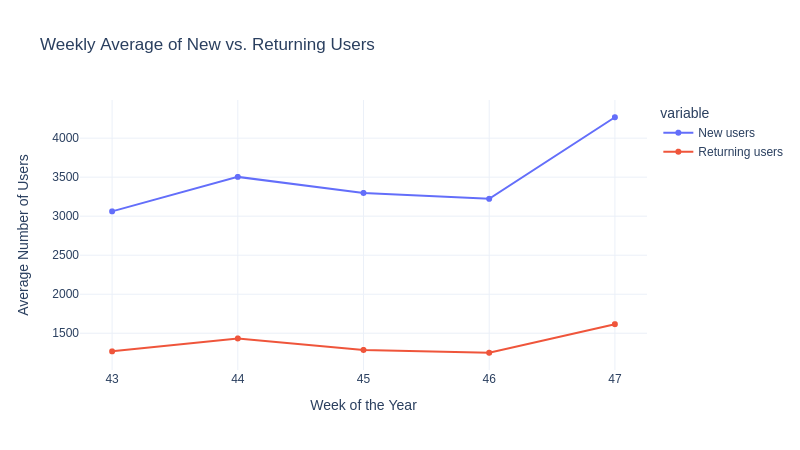

In [22]:
fig_1 = px.line(weekly_averages, x='Week', y=['New users', 'Returning users'], markers=True,
               labels={'value': 'Average Number of Users'}, title='Weekly Average of New vs. Returning Users')
fig_1.update_xaxes(title='Week of the Year')
fig_1.update_yaxes(title='Average Number of Users')



gitly.show(fig_1)


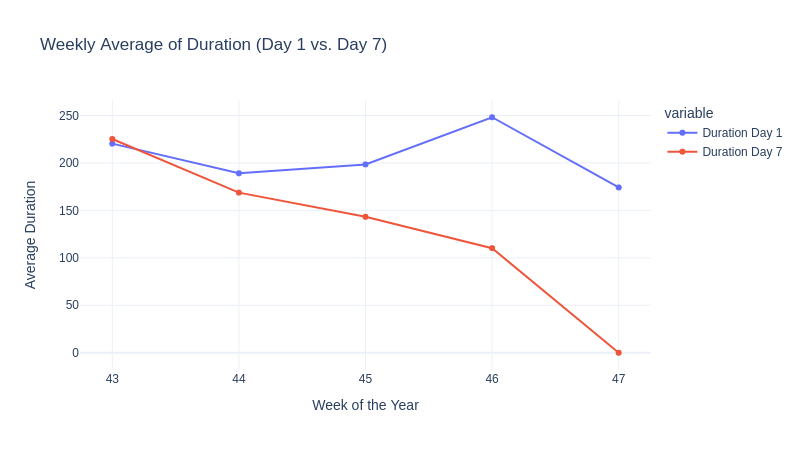

In [23]:
fig_2 = px.line(weekly_averages, x='Week', y=['Duration Day 1', 'Duration Day 7'], markers=True,
               labels={'value': 'Average Duration'}, title='Weekly Average of Duration (Day 1 vs. Day 7)')
fig_2.update_xaxes(title='Week of the Year')
fig_2.update_yaxes(title='Average Duration')

gitly.show(fig_2)

Here are some general steps and considerations we might take to understand why there is an increase in user interaction during the 47th week in fig1

1.  Data Segmentation:Break down the data further to identify any patterns or trends within specific segments of the user base. For example, you might want to look at user demographics, geographic location, or device type to see if certain subgroups are driving the increase.

2.  Feature or Product Changes:Examine any changes or updates made to your platform or product during the 47th week. It could be the introduction of new features, improvements in user experience, or marketing campaigns that attracted more users.

3.  Seasonal Trends:Consider whether there are any seasonal factors that could be influencing user behavior. Certain times of the year, holidays, or special events can impact user engagement.

4.  Marketing and Promotions:Evaluate any marketing activities or promotions that occurred during the 47th week. Increased advertising, discounts, or special events could attract more users to your platform.


Here are some steps and considerations we can take to analyze and identify potential reasons for the observed decrease in fig2

1.  Segmentation:Break down the data into different segments to see if the decrease in average duration is consistent across all user groups or if it's more prominent in specific segments (e.g., new users, returning users, different demographics).

2.  User Behavior Analysis:Look into user behavior patterns during the 47th week. Are there specific features or actions that users are engaging with less frequently? Are there changes in the user journey or navigation that might be affecting engagement?

3.  Product or Content Changes:Check if there were any changes to the product or content during the 47th week. Updates, modifications, or changes in the type of content available could influence how users interact with your platform.

4.  Technical Issues:Investigate if there were any technical issues during the 47th week that may have affected the user experience or caused disruptions. Slow loading times, glitches, or other technical issues can lead to a decrease in user engagement.

5.  Marketing Campaigns:Assess whether any marketing campaigns or promotions were run during the 47th week. Sometimes, promotions can attract users who are less likely to engage for an extended period, leading to a decrease in average duration.

Creating a cohort chart to understand the cohort matrix of weekly averages. In the cohort chart, each row will correspond to a week of the year, and each column will represent a different metric:

Average number of new users.

Average number of returning users.

Average duration on Day 1.

Average duration on Day 7.

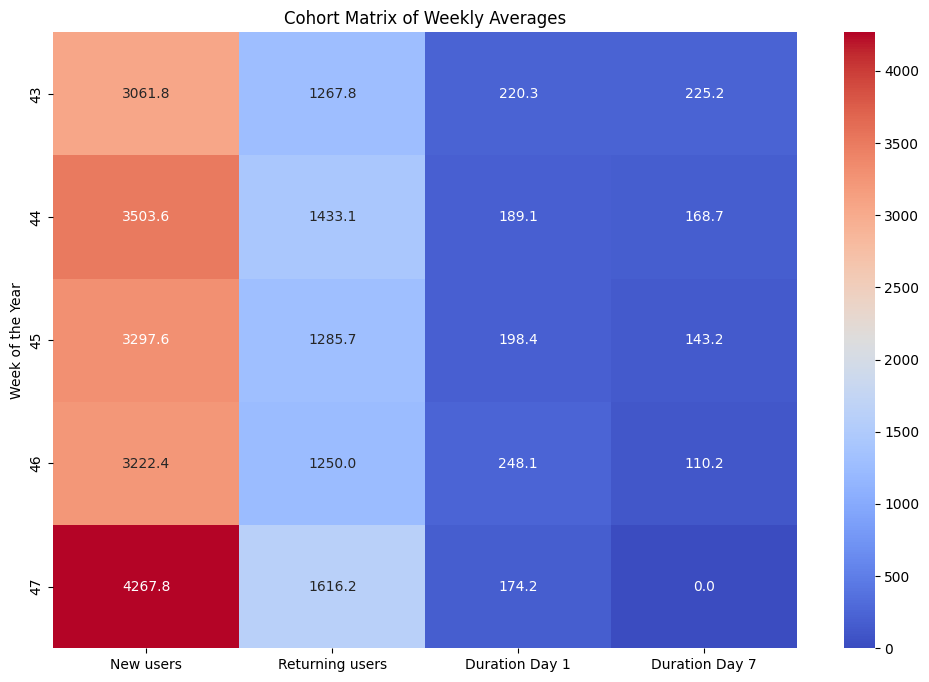

In [24]:
# Creating a cohort matrix
cohort_matrix = weekly_averages.set_index('Week')

# Plotting the cohort matrix
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()

We can see that the number of new users and returning users fluctuates from week to week. Notably, there was a significant increase in both new and returning users in Week 47. The average duration of user engagement on Day 1 and Day 7 varies across the weeks. The durations do not follow a consistent pattern about the number of new or returning users, suggesting that other factors might be influencing user engagement.



# Summary

Cohort Analysis is a data analysis technique used to gain insights into the behaviour and characteristics of specific groups of users or customers over time. It is valuable for businesses as it allows them to understand user behaviour in a more granular and actionable way.